In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from models.mnist import MNIST8k
from torchsummary import summary
from utils import train, test, plot_stats, PlotOutput, get_device

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
device = get_device()
device

'cuda'

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-7., 7.), fill=(0,)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [5]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

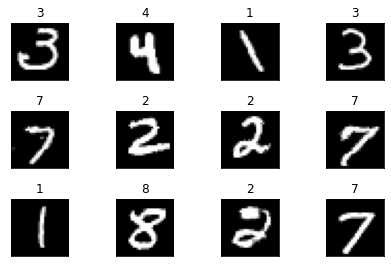

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
    plt.subplot(3,4,i+1)
    plt.tight_layout()
    plt.imshow(batch_data[i].squeeze(0), cmap='gray')
    plt.title(batch_label[i].item())
    plt.xticks([])
    plt.yticks([])

In [7]:
"""
RF_out = RF_in + (kernel-1) * J_in
J_out = J_in * stride
"""

'\nRF_out = RF_in + (kernel-1) * J_in\nJ_out = J_in * stride\n'

In [8]:
model = MNIST8k().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
       BatchNorm2d-2            [-1, 8, 28, 28]              16
              ReLU-3            [-1, 8, 28, 28]               0
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5            [-1, 8, 28, 28]             576
       BatchNorm2d-6            [-1, 8, 28, 28]              16
              ReLU-7            [-1, 8, 28, 28]               0
           Dropout-8            [-1, 8, 28, 28]               0
        BasicBlock-9            [-1, 8, 28, 28]               0
       InputBlock-10            [-1, 8, 28, 28]               0
           Conv2d-11            [-1, 8, 14, 14]             576
           Conv2d-12            [-1, 8, 14, 14]             576
      BatchNorm2d-13            [-1, 8, 14, 14]              16
             ReLU-14            [-1, 8,

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.20, verbose=True)

criterion = F.cross_entropy
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train(model, device, train_loader, optimizer, criterion)
    test_loss = test(model, device, test_loader, criterion)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0576 Batch_id=1874 Accuracy=92.32: 100%|██████████| 1875/1875 [00:27<00:00, 68.81it/s]


Test set: Average loss: 0.0878, Accuracy: 9703/10000 (97.03%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0385 Batch_id=1874 Accuracy=97.72: 100%|██████████| 1875/1875 [00:28<00:00, 65.70it/s]


Test set: Average loss: 0.0415, Accuracy: 9872/10000 (98.72%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0074 Batch_id=1874 Accuracy=98.19: 100%|██████████| 1875/1875 [00:29<00:00, 64.22it/s]


Test set: Average loss: 0.0443, Accuracy: 9866/10000 (98.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0203 Batch_id=1874 Accuracy=98.31: 100%|██████████| 1875/1875 [00:28<00:00, 64.88it/s]


Test set: Average loss: 0.0346, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 5


Train: Loss=0.0148 Batch_id=1874 Accuracy=98.94: 100%|██████████| 1875/1875 [00:27<00:00, 68.65it/s]


Test set: Average loss: 0.0186, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 6


Train: Loss=0.0314 Batch_id=1874 Accuracy=99.06: 100%|██████████| 1875/1875 [00:27<00:00, 68.13it/s]


Test set: Average loss: 0.0192, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 7


Train: Loss=0.0062 Batch_id=1874 Accuracy=99.15: 100%|██████████| 1875/1875 [00:27<00:00, 67.49it/s]


Test set: Average loss: 0.0183, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 2.0000e-03.
Epoch 8


Train: Loss=0.0013 Batch_id=1874 Accuracy=99.16: 100%|██████████| 1875/1875 [00:27<00:00, 67.22it/s]


Test set: Average loss: 0.0183, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 9


Train: Loss=0.0016 Batch_id=1874 Accuracy=99.28: 100%|██████████| 1875/1875 [00:27<00:00, 66.98it/s]


Test set: Average loss: 0.0168, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 10


Train: Loss=0.0103 Batch_id=1874 Accuracy=99.28: 100%|██████████| 1875/1875 [00:27<00:00, 67.76it/s]


Test set: Average loss: 0.0163, Accuracy: 9952/10000 (99.52%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 11


Train: Loss=0.0047 Batch_id=1874 Accuracy=99.28: 100%|██████████| 1875/1875 [00:27<00:00, 68.07it/s]


Test set: Average loss: 0.0172, Accuracy: 9959/10000 (99.59%)

Adjusting learning rate of group 0 to 4.0000e-04.
Epoch 12


Train: Loss=0.0028 Batch_id=1874 Accuracy=99.32: 100%|██████████| 1875/1875 [00:26<00:00, 69.55it/s]


Test set: Average loss: 0.0168, Accuracy: 9953/10000 (99.53%)

Adjusting learning rate of group 0 to 8.0000e-05.
Epoch 13


Train: Loss=0.0088 Batch_id=1874 Accuracy=99.28: 100%|██████████| 1875/1875 [00:27<00:00, 67.98it/s]


Test set: Average loss: 0.0163, Accuracy: 9951/10000 (99.51%)

Adjusting learning rate of group 0 to 8.0000e-05.
Epoch 14


Train: Loss=0.0038 Batch_id=1874 Accuracy=99.32: 100%|██████████| 1875/1875 [00:27<00:00, 68.80it/s]


Test set: Average loss: 0.0165, Accuracy: 9956/10000 (99.56%)

Adjusting learning rate of group 0 to 8.0000e-05.
Epoch 15


Train: Loss=0.0015 Batch_id=1874 Accuracy=99.33: 100%|██████████| 1875/1875 [00:26<00:00, 69.74it/s]


Test set: Average loss: 0.0166, Accuracy: 9956/10000 (99.56%)

Adjusting learning rate of group 0 to 8.0000e-05.


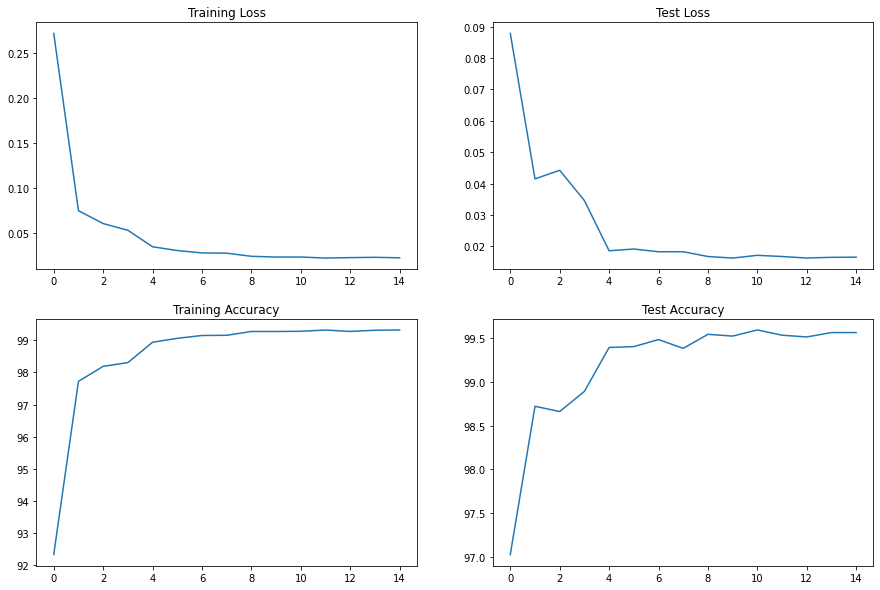

In [10]:
plot_stats()

100%|██████████| 313/313 [00:02<00:00, 145.87it/s]


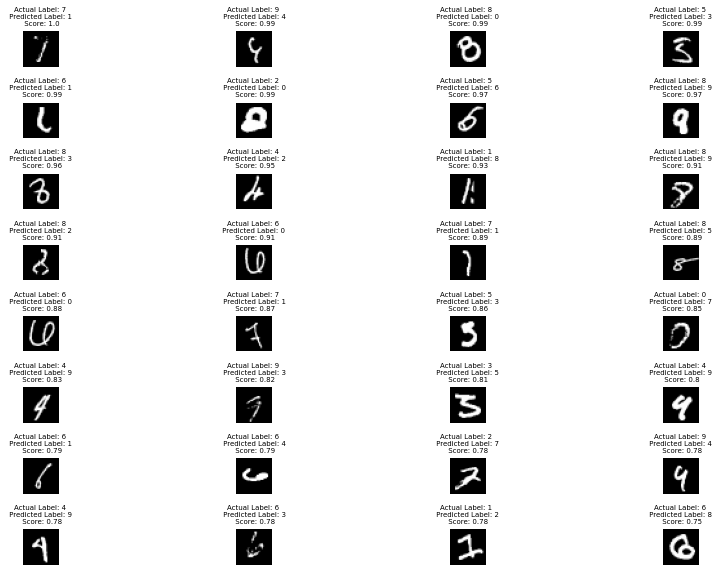

In [12]:
# plot incorrect plus very difficult classifications
p = PlotOutput(device)
p.run_prediction(model, test_loader, ptype="incorrect")
p.plot(n=32, reverse=True)

100%|██████████| 313/313 [00:02<00:00, 134.50it/s]


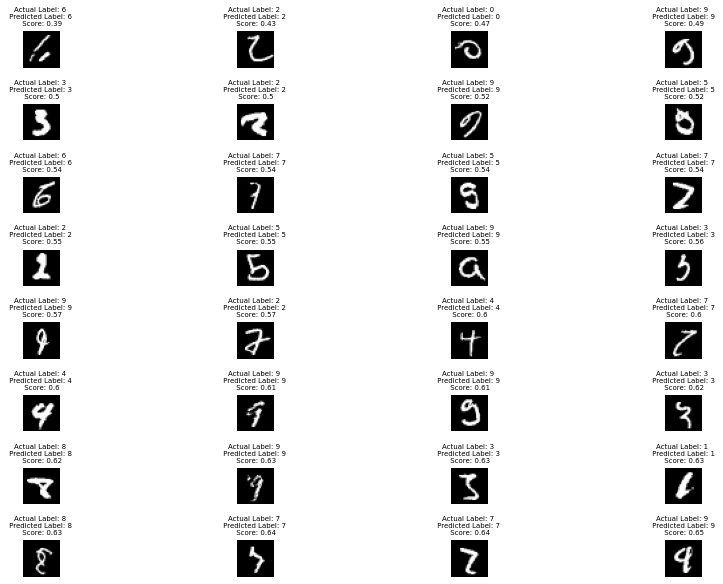

In [13]:
# plot correct yet difficult classifications
p.run_prediction(model, test_loader, ptype="correct")
p.plot(n=32, reverse=False)